##Data Understanding



In [ ]:
# Import all of the library that will be used
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import pickle
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# Function created to visualize the data
def plot_cat(df,categorical_col):
    '''
    This function is to generate plots for categorical columns

    Parameters
    ----------
    df : TYPE
        DESCRIPTION.
    categorical_col : TYPE
        DESCRIPTION.

    Returns
    -------
    None.

    '''
    for i in categorical_col:
        plt.figure() 
        sns.countplot(df[i]) 
        plt.show()

def plot_con(df,continuous_col):
    '''
    This function is to generate plots for continuous columns

    Parameters
    ----------
    df : TYPE
        DESCRIPTION.
    continuous_col : TYPE
        DESCRIPTION.

    Returns
    -------
    None.

    '''
    for j in continuous_col:
        plt.figure()
        sns.distplot(df[j])
        plt.show()

def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,         
        Journal of the Korean Statistical Society 42 (2013): 323-328    
    """    
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n    
    r,k = confusion_matrix.shape    
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

###Collect Data

The Breast Cancer Wisconsin (Diagnostic) Dataset is used in this project and it is obtained from UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. 

In [ ]:
# Data loading
df = pd.read_csv('/content/drive/MyDrive/Lecture Notes Master/Sem 1/WQD7003 Data Analytics/breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


###Describe Data

The dataset used is a secondary dataset and consists of 569 instances and 32 attributes which 2 of them are categorical attributes and the rest are continuous attributes.

In [ ]:
# Check the info of the dataset (datatype, null count,total rows, total columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Inspect the column names
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# Describe the dataset statistically for the continuous columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


###Verify Data Quality

In [ ]:
# Check sum of duplicated values
df.duplicated().sum()

0

There is no any duplicated values in the dataset.

In [ ]:
# Since the ID column has no function to the ml model training, it has to be removed
df = df.drop(labels='id',axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Check the total null values
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

The output above showed that there is no null values in the dataset.

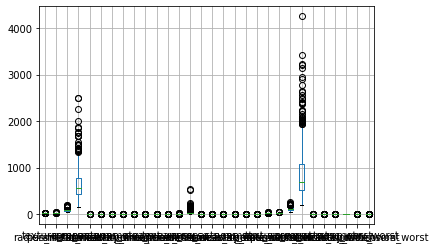

In [ ]:
# Check the outliers by using boxplot
df.boxplot()

The output above showed that area_mean, area_se and area_worst contain outliers.

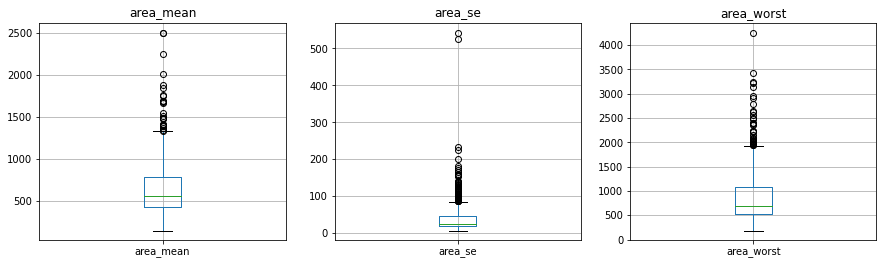

In [ ]:
# Inspect the columns (area mean, area se, area worst) that have outlier by using boxplot
outlier = ['area_mean','area_se','area_worst']
fig, axs = plt.subplots(1, 3, figsize=(15, 4)) 
for ax, out in zip(axs,outlier):
  df.boxplot(column=out,ax=ax)
  ax.set_title(out)
plt.show()

###Explore Data

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


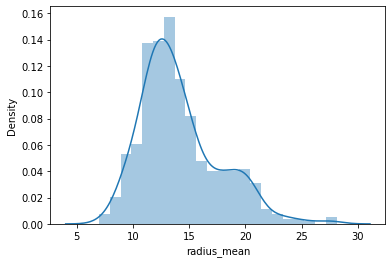

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


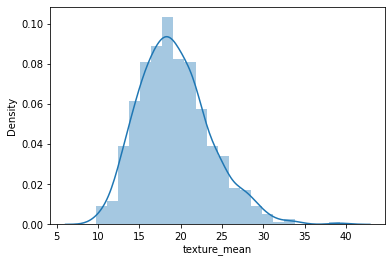

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


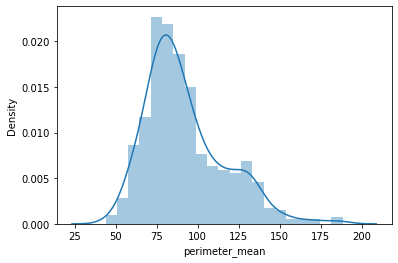

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


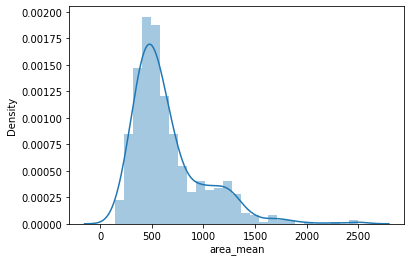

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


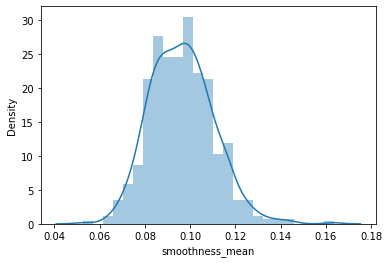

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


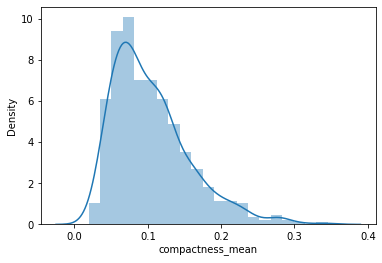

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


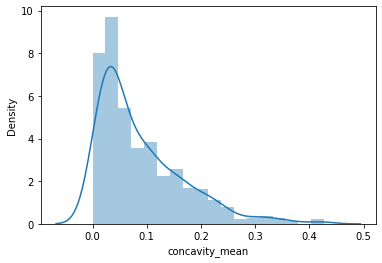

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


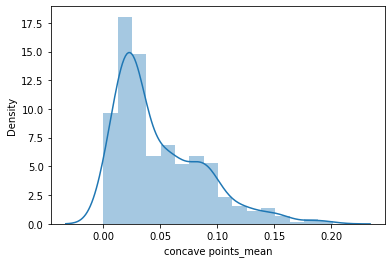

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


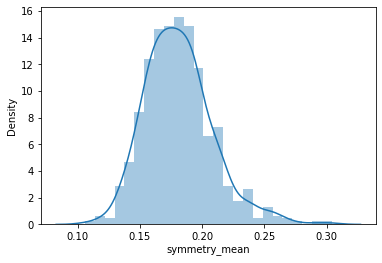

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


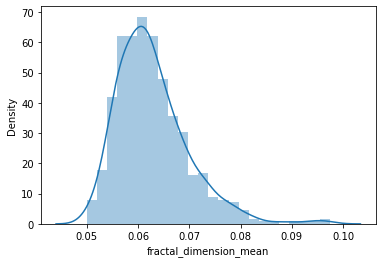

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


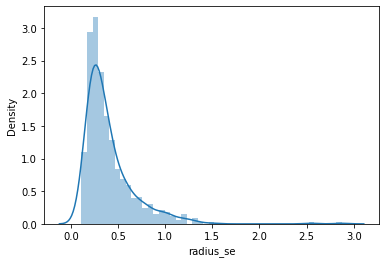

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


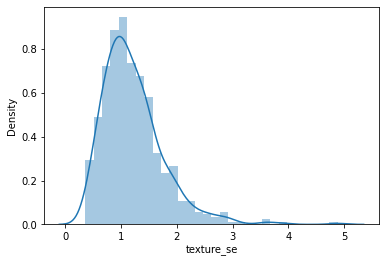

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


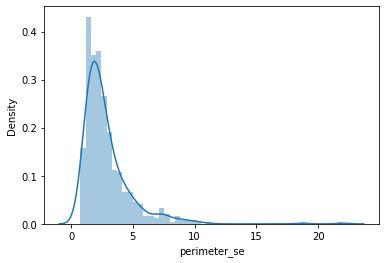

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


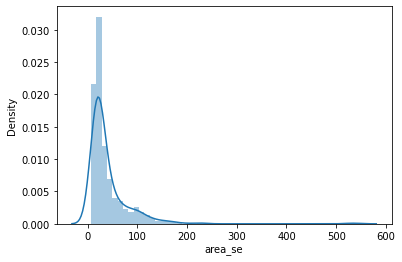

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


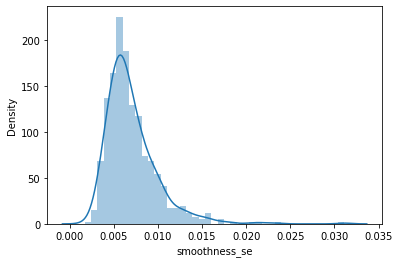

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


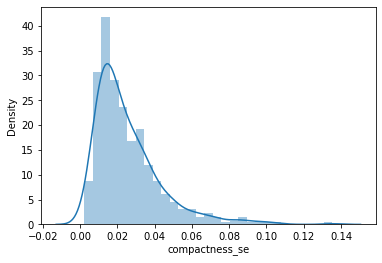

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


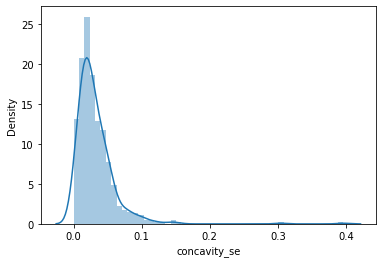

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


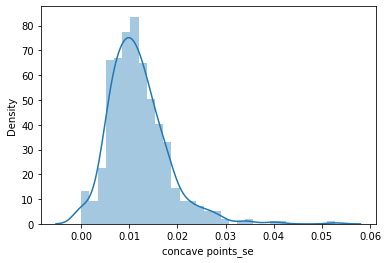

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


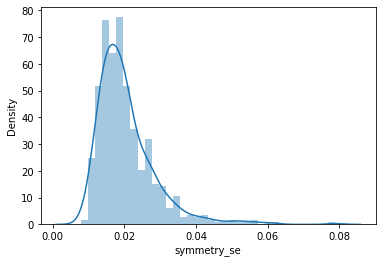

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


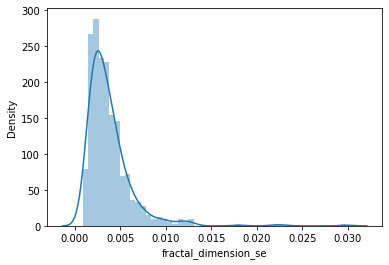

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


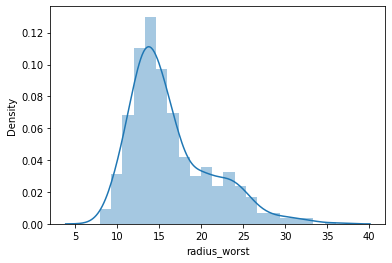

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


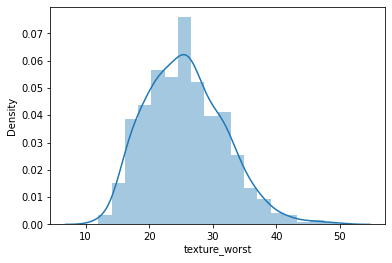

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


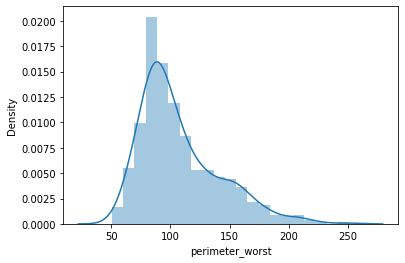

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


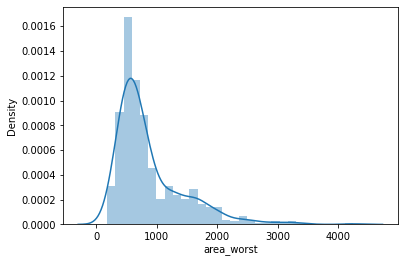

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


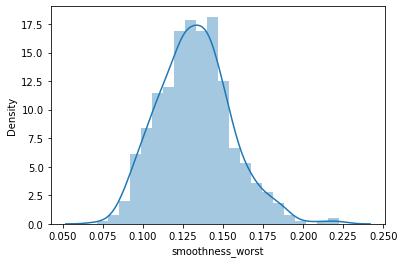

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


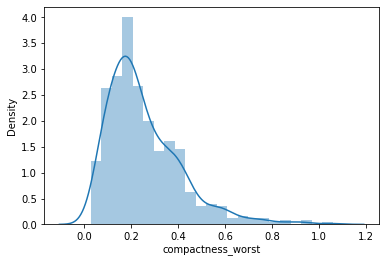

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


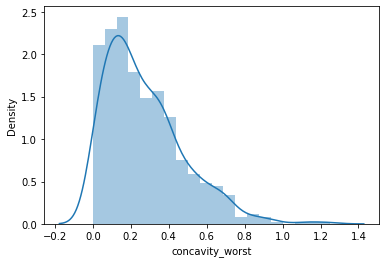

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


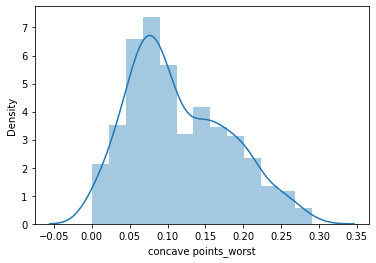

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


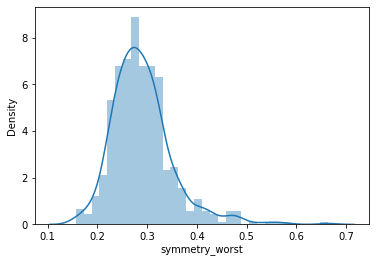

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


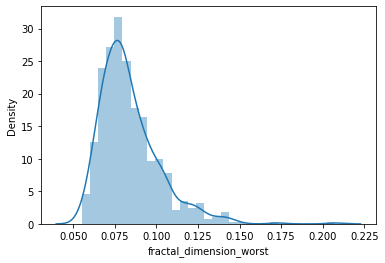

In [ ]:
# Visualize the continuous data by calling the plot_con() function that has been created
con_data = df.columns[df.dtypes=='float64']
plot_con(df, con_data)

Based on the distributions shown above, we can see that all the continuous attributes are right-skewed.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


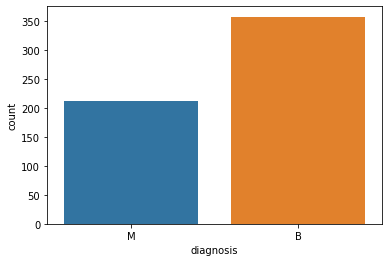

In [ ]:
# Visualize the categorical data by calling the plot_cat() function that has been created
cat_data = df.columns[df.dtypes=='object']
plot_cat(df, cat_data)

It seems that the target output, 'diagnosis' is unbalanced, which can lead to bias during the machine learning training. Therefore, accuracy will not be a good evaluation metric for this dataset.

##Data Preparation

Since there is no null values and no duplicated values, so no need to clean the data. Nevertheless, three of the features in this dataset contains outlier. Therefore, we will not remove the outlier first, just proceed to the next step to check the accuracy of the machine learning model.

In [ ]:
# Change the 'diagnosis' target into number by using Label Encoder because machine can read digit only.
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# saving the label encoder to translate back the 'diagnosis' data into readable form in the future.
LE_PATH = os.path.join(os.getcwd(),'le_breast.pkl')
with open(LE_PATH,'wb') as file:
  pickle.dump(le,file)


**Categorical vs categorical(target) using cramer's V**
> Since the only categorical data is 'diagnosis' column and the target data is 'diagnosis' column, so no need to check for the correlation using cramer's V statistics as shown in function cell






In [ ]:
# Check the correlation of continuous featrues vs categorical target ('diagnosis') using Logistic Regression
for con in con_data:
  logreg = LogisticRegression()
  logreg.fit(np.expand_dims(df[con],axis=-1), df['diagnosis'])
  print(con + ": " + str(logreg.score(np.expand_dims(df[con],axis=-1),df['diagnosis'])))

radius_mean: 0.8787346221441125
texture_mean: 0.7047451669595782
perimeter_mean: 0.8822495606326889
area_mean: 0.8840070298769771
smoothness_mean: 0.6274165202108963
compactness_mean: 0.6889279437609842
concavity_mean: 0.7926186291739895
concave points_mean: 0.6783831282952548
symmetry_mean: 0.6274165202108963
fractal_dimension_mean: 0.6274165202108963
radius_se: 0.7996485061511424
texture_se: 0.6274165202108963
perimeter_se: 0.7943760984182777
area_se: 0.8664323374340949
smoothness_se: 0.6274165202108963
compactness_se: 0.6274165202108963
concavity_se: 0.6256590509666081
concave points_se: 0.6274165202108963
symmetry_se: 0.6274165202108963
fractal_dimension_se: 0.6274165202108963
radius_worst: 0.9138840070298769
texture_worst: 0.7205623901581723
perimeter_worst: 0.9191564147627417
area_worst: 0.9103690685413005
smoothness_worst: 0.6274165202108963
compactness_worst: 0.789103690685413
concavity_worst: 0.8400702987697716
concave points_worst: 0.836555360281195
symmetry_worst: 0.67486818



> Since radius_mean, texture_mean,  perimeter_mean, area_mean, concavity_mean, radius_se, perimeter_se, area_se, radius_worst, texture_worst, perimeter_worst, area_worst, compactness_worst, concavity_worst, concave points_worst has high percentage correlation (>0.7) to the target ('diagnosis') when trained with Logistic Regression, they will be chosen as the features.



In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Splitting the dataset to training set and testing set using train_test_split() function
df_features=['radius_mean','texture_mean','perimeter_mean','area_mean','concavity_mean','radius_se','perimeter_se','area_se',
            'radius_worst','texture_worst','perimeter_worst','area_worst','compactness_worst','concavity_worst','concave_points_worst']

X = df.loc[:,df_features]
y = df.loc[:,'diagnosis']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)

##Modelling

**Five machine learning models are used for this dataset since it is a classsification problem. The best machine learning model is chosen automatically by using machine learning pipeline. List of machine learning models used are as follows:**
> Logistic Regression, Random Forest Classifier, Decision Tree Classifier, KNeighbors Classifier & Support Vector Classifier.

In [ ]:
# Create a pipeline for the all of the machine learning models using Pipeline() function
# Logistic Regression
pl_std_lr = Pipeline([('Standard Scaler',StandardScaler()),
                      ('LogClassifier',LogisticRegression())]) 

pl_mm_lr = Pipeline([('Min Max Scaler',MinMaxScaler()),
                     ('LogClassifier',LogisticRegression())])

#Random Forest
pl_std_rf = Pipeline([('Standard Scaler',StandardScaler()),
                      ('RFClassifier',RandomForestClassifier())]) 

pl_mm_rf = Pipeline([('Min Max Scaler',MinMaxScaler()),
                     ('RFClassifier',RandomForestClassifier())]) 

# Decision Tree
pl_std_tree = Pipeline([('Standard Scaler',StandardScaler()),
                        ('DTClassifier',DecisionTreeClassifier())]) 

pl_mm_tree = Pipeline([('Min Max Scaler',MinMaxScaler()),
                       ('DTClassifier',DecisionTreeClassifier())]) 

# KNeighbors
pl_std_knn = Pipeline([('Standard Scaler',StandardScaler()),
                       ('KNClassifier',KNeighborsClassifier())]) 

pl_mm_knn = Pipeline([('Min Max Scaler',MinMaxScaler()),
                      ('KNClassifier',KNeighborsClassifier())])

# Support Vector
pl_std_svc = Pipeline([('Standard Scaler',StandardScaler()),
                       ('SVClassifier',SVC())]) 

pl_mm_svc = Pipeline([('Min Max Scaler',MinMaxScaler()),
                      ('SVClassifier',SVC())])

# create pipeline list
pipelines = [pl_std_lr,pl_mm_lr,pl_std_rf,pl_mm_rf,pl_std_tree,
             pl_mm_tree,pl_std_knn,pl_mm_knn,pl_std_svc,pl_mm_svc]

In [ ]:
# Fit the training data into all of the models using for loop.
for pipe in pipelines:
  pipe.fit(X_train,y_train)

pipe_dict = {0:'SS+LR', 
             1:'MM+LR',
             2:'SS+RF',
             3:'MM+RF',
             4:'SS+Tree',
             5:'MM+Tree',
             6:'SS+KNN',
             7:'MM+KNN',
             8:'SS+SVC',
             9:'MM+SVC'}
best_accuracy = 0

In [ ]:
# Evaluate all of the models
scores = []
model_names = list(pipe_dict.values())
for i,model in enumerate(pipelines):
  scores = [model.score(X_test, y_test) for model in pipelines]
  if model.score(X_test, y_test) > best_accuracy:
    best_accuracy = model.score(X_test,y_test)
    best_pipeline = model
    best_scaler = pipe_dict[i]
  result = pd.DataFrame({
      'Model':model_names,
      'Score':scores})
print(result)
print("*" * 100)
print('The best pipeline for type of breast cancer dataset will be {} with accuracy of {}'
      .format(best_scaler, best_accuracy))

     Model     Score
0    SS+LR  0.964912
1    MM+LR  0.970760
2    SS+RF  0.947368
3    MM+RF  0.953216
4  SS+Tree  0.929825
5  MM+Tree  0.929825
6   SS+KNN  0.959064
7   MM+KNN  0.959064
8   SS+SVC  0.970760
9   MM+SVC  0.970760
****************************************************************************************************
The best pipeline for type of breast cancer dataset will be MM+LR with accuracy of 0.9707602339181286


### Process of fine tuning the best machine learning model

> The purpose of fine tuning the model is to further increase the accuracy of the best machine learning model by changing some parameters inside the best machine learning model function as shown below. ased on the pipeline, model with highest accuracy is Min Max Scaler and Logistic Regression with accuracy of 0.971. 

In [ ]:
pl_mm_lr = Pipeline([('Min Max Scaler',MinMaxScaler()),
                     ('LogClassifier',LogisticRegression())])

# changing the parameters
grid_param = [{'LogClassifier':[LogisticRegression()],
               'LogClassifier__solver':['lbfgs','liblinear','newton-cg'],
               'LogClassifier__C':[0.2,0.5,1.0,1.5]}]

gridsearch = GridSearchCV(pl_mm_lr,grid_param,cv=5,verbose=1,n_jobs=1)
best_model = gridsearch.fit(X_train, y_train)
print(best_model.score(X_test,y_test))
print(best_model.best_index_)
print(best_model.best_params_)

# saving the best pipeline
BEST_PIPE_PATH = os.path.join(os.getcwd(),'breast_fine_tune.pkl')
with open(BEST_PIPE_PATH,'wb') as file:
  pickle.dump(best_model,file)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.9766081871345029
9
{'LogClassifier': LogisticRegression(C=1.5), 'LogClassifier__C': 1.5, 'LogClassifier__solver': 'lbfgs'}


> Since the accuracy is about the same(0.976 (added 0.006)) but different in parameters,the ml model will use the fine tune parameters which are C= 1.5 and solver= lbfgs.

In [ ]:
# Retrain the best machine learning model using the best parameter from fine tuning process.
pl_mm_lr = Pipeline([('Min Max Scaler',MinMaxScaler()),
                     ('LogClassifier',LogisticRegression(C=1.5,solver='lbfgs'))])
pl_mm_lr.fit(X_train,y_train)

# saving the best model
MODEL_PATH = os.path.join(os.getcwd(),'best_model_breast.pkl')
with open(MODEL_PATH,'wb') as file:
  pickle.dump(pl_mm_lr,file)

### Model Evaluation

> The best machine learning model with the best parameter is evaluated by using classification report, confusion matrix and accuracy score from sklearn.mterics library

In [ ]:
y_true = y_test
y_pred = pl_mm_lr.predict(X_test)

print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))
print('Accuracy score: ' + str(round((accuracy_score(y_true, y_pred)*100),3)) + "%")

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       109
           1       0.97      0.97      0.97        62

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

[[107   2]
 [  2  60]]
Accuracy score: 97.661%


> Receiver Operator Characteristics (ROC) to summarize the trade-off between False Positive Rate (FPR) and True Positive Rate (TPR).

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Create prediction probabilities
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = pl_mm_lr.predict_proba(X_test)

# Consider positive case only
lr_probs = lr_probs[:, 1]

# Summarize AUC Score
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Print out probabilities
print('No-Skill Prediction: AUC = %.3f' % (ns_auc))
print('LogisticRegression: AUC = %.3f' % (lr_auc))

No-Skill Prediction: AUC = 0.500
LogisticRegression: AUC = 0.996


> Area Under Curve (AUC) is the measure of the model's ability to distinguish between positive and negative instances.

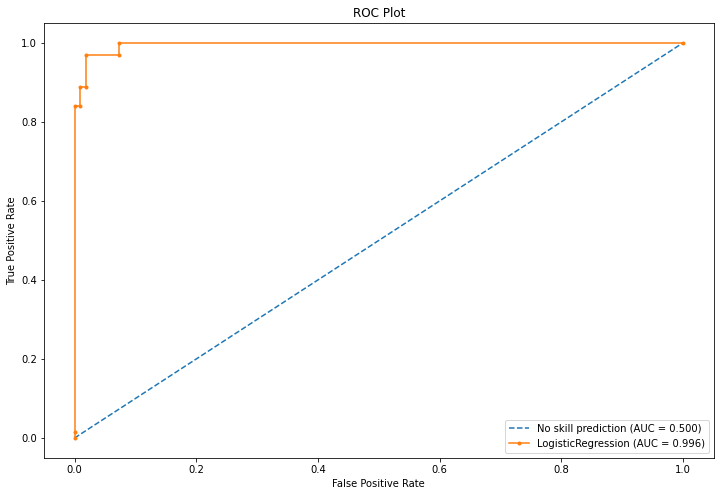

In [ ]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.figure(figsize=(12, 8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No skill prediction (AUC = %0.3f)' % ns_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='LogisticRegression (AUC = %0.3f)' % lr_auc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()

##Deployment




* Plan deployment: Streamlit apps

---


* Plan monitoring and maintenance:  update the machine learning model to increase the accuracy, record relevant analysis steps and problems arising from modeling


---


* Produce final report

---


* Review project








### Streamlit apps

>For deployment part, the final machine learning model is deployed by using Streamlit app. 

In [ ]:
%%writefile breast_app.py
import streamlit as st
import os
import numpy as np
import pickle

MODEL_PATH = '/content/best_model_breast.pkl'

with open(MODEL_PATH,'rb') as file:
  model = pickle.load(file)

with st.form("Patient's Form"):
  st.title("Type of Breast Cancer Prediction")
  st.video("https://youtube.com/watch?v=FTH56ifHt28&si=EnSIkaIECMiOmarE", format="video/mp4") 
  # credit video: "Common Types of Breast Cancer" By Mayo Clinic YouTube channel
  st.image("https://www.verywellhealth.com/thmb/LoHuaSfq_qbKGtSNk3yWBeS0f7s=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/514240-article-img-malignant-vs-benign-tumor2111891f-54cc-47aa-8967-4cd5411fdb2f-5a2848f122fa3a0037c544be.png")
  # credit: verywellhealth.com website
  st.header("Let's check the type of your breast cancer!")
  radius_mean = int(st.number_input("Key in your radius of lobes: "))
  texture_mean = int(st.number_input("Key in your mean of surface texture: "))
  perimeter_mean = int(st.number_input("Key in your outer perimeter of lobes: "))
  area_mean = int(st.number_input("Key in your mean area of lobes: "))
  concavity_mean = int(st.number_input("Key in the mean of concavity: "))
  radius_se = int(st.number_input("Key in the radius of se: "))
  perimeter_se = int(st.number_input("Key in the perimeter of se: "))
  area_se = int(st.number_input("Key in the area of se: "))
  radius_worst = int(st.number_input("Key in your breast worst radius: "))
  texture_worst = int(st.number_input("Key in your breast worst texture: "))
  perimeter_worst = int(st.number_input("Key in your breast worst perimeter: "))
  area_worst = int(st.number_input("Key in your breast worst area: "))
  compactness_worst = int(st.number_input("Key in your breast worst compactness: "))
  concavity_worst = int(st.number_input("Key in your breast worst concavity: "))
  concave_points_worst = int(st.number_input("Key in your breast worst concave points: "))
    
  # Every form must have a submit button.
  submitted = st.form_submit_button("Submit")
  if submitted:
    st.write("Radius of lobes:",radius_mean,
              "Mean of surface texture:",texture_mean,
              "Outer perimeter of lobes:",perimeter_mean,
              "Mean area of lobes:",area_mean,
              "Mean of concavity:",concavity_mean,
              "Radius of se:",radius_se,
              "Perimeter of se:",perimeter_se,
              "Area of se:",area_se,
              "Worst radius:",radius_worst,
              "Worst texture:",texture_worst,
              "Worst perimeter:",perimeter_worst,
              "Worst area:",area_worst,
              "Worst compactness:",compactness_worst,
              "Worst concavity:",concavity_worst,
              "Worst concave points:",concave_points_worst)
    temp = np.expand_dims([radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,
                            radius_se,perimeter_se,area_se,radius_worst,texture_worst,
                            perimeter_worst,area_worst,compactness_worst,concavity_worst,
                            concave_points_worst], axis=0)
    outcome = model.predict(temp)
        
    outcome_dict = {0:'Breast cancer type benign',
                    1:'Breast cancer type malignant'}
        
    if outcome == 1:
      st.snow()
      st.markdown('Your breast cancer type is malignant!')
      st.write("Please consult with you doctor for further medical assessment!")
      st.image("https://www.caring.com/graphics/caring-heart-healthy-tips.jpg")
      # Credit pic: caring.com website
    else:
      st.balloons()
      st.markdown('Your breast cancer type is benign!')
      st.write("Your breast cancer is not as fatal as malignant tumor since the tumor will not spread out!")
      st.write("Please consult with you doctor for further medical assessment!")
      st.image("https://www.lifebiotic.com/wp-content/uploads/breast_cancer_infographic_lifebiotic.png")
      # Credit pic: lifebiotics.com website

Overwriting breast_app.py
